In [22]:
%load_ext autoreload 
%autoreload 2
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
sns.set_style('white')
sys.path.insert(0, '../')
from curve_models import NLLS_three_param, power_law_three_param, power_law_exp_three_param
from curve_models import NLLS_w, power_law
from curve_models import BrokenCurve, power_law

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

afa_method = 'Weighted'
init_mode = 'uniform'
mltiny_expmt = '0.1_5_False_' + init_mode + '_30_0.5_0.5_5250_21000_213973'
gltiny_expmt = '0.1_5_False_uniform_30_0.5_0.5_1880_9400_94001'

gl_expmt = '0.1_5_False_' + init_mode + '_30_0.5_0.5_5800_29000_290001'
ml_expmt = '0.1_5_False_' + init_mode + '_30_0.5_0.5_20000_100000_1000001'
#expmts = [('gl', gl_expmt), ('gl-tiny', gltiny_expmt), ('ml-20m-uniform', ml_expmt), ('ml-20m-tiny', mltiny_expmt)]
expmts = [('ml-20m-tiny', mltiny_expmt), ('gl-tiny', gltiny_expmt),
          ('ml-20m-uniform',  ml_expmt), ('gl', gl_expmt)]

expmts = [('gl', gl_expmt),  ('gl-tiny', gltiny_expmt), 
           ('ml-20m-uniform', ml_expmt), ('ml-20m-tiny',  mltiny_expmt)]
dataset_titles = {'gl': 'GoogleLocal-L', 'gl-tiny': 'GoogleLocal-S', 'ml-20m-tiny': 'MovieLens-S',
                 'ml-20m-uniform': 'MovieLens-L'}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


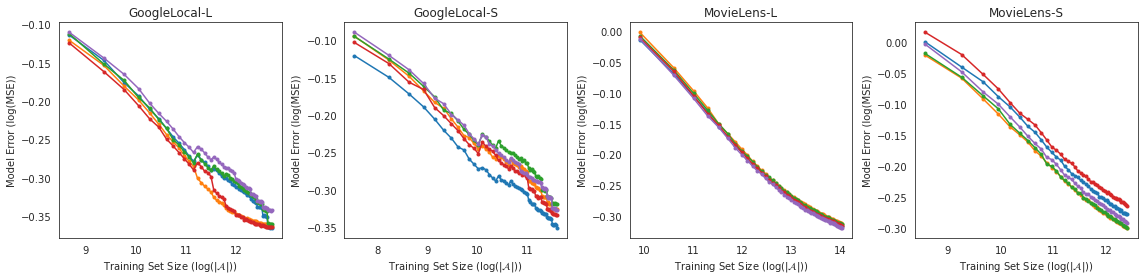

In [27]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

for i, (dataset_name, expmt) in enumerate(expmts):
    ax = axs[i]
    results_dir = "../results/forecasting/" + dataset_name + "/Weighted/"
    results_path = results_dir + expmt + '/'

    all_ss = np.loadtxt(results_path + 'sample_sizes')
    all_mses = np.loadtxt(results_path + 'mses')
    for run in range(5):
        ax.plot(np.log(all_ss[run][:]), np.log(all_mses[run][:]), marker='.')
    ax.set_title(dataset_titles[dataset_name])
    ax.set_ylabel("Model Error (log(MSE))")
    ax.set_xlabel("Training Set Size (log($|\mathcal{A}|$))")
plt.tight_layout()
plt.savefig("../figs/stability_performance_curves.png")